# machine learning - logistic regression

In [6]:
import numpy as np

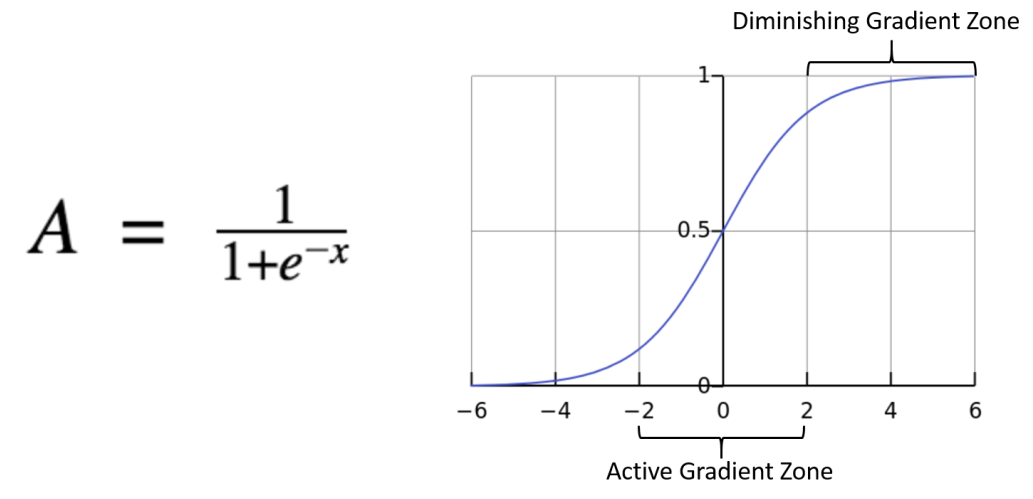

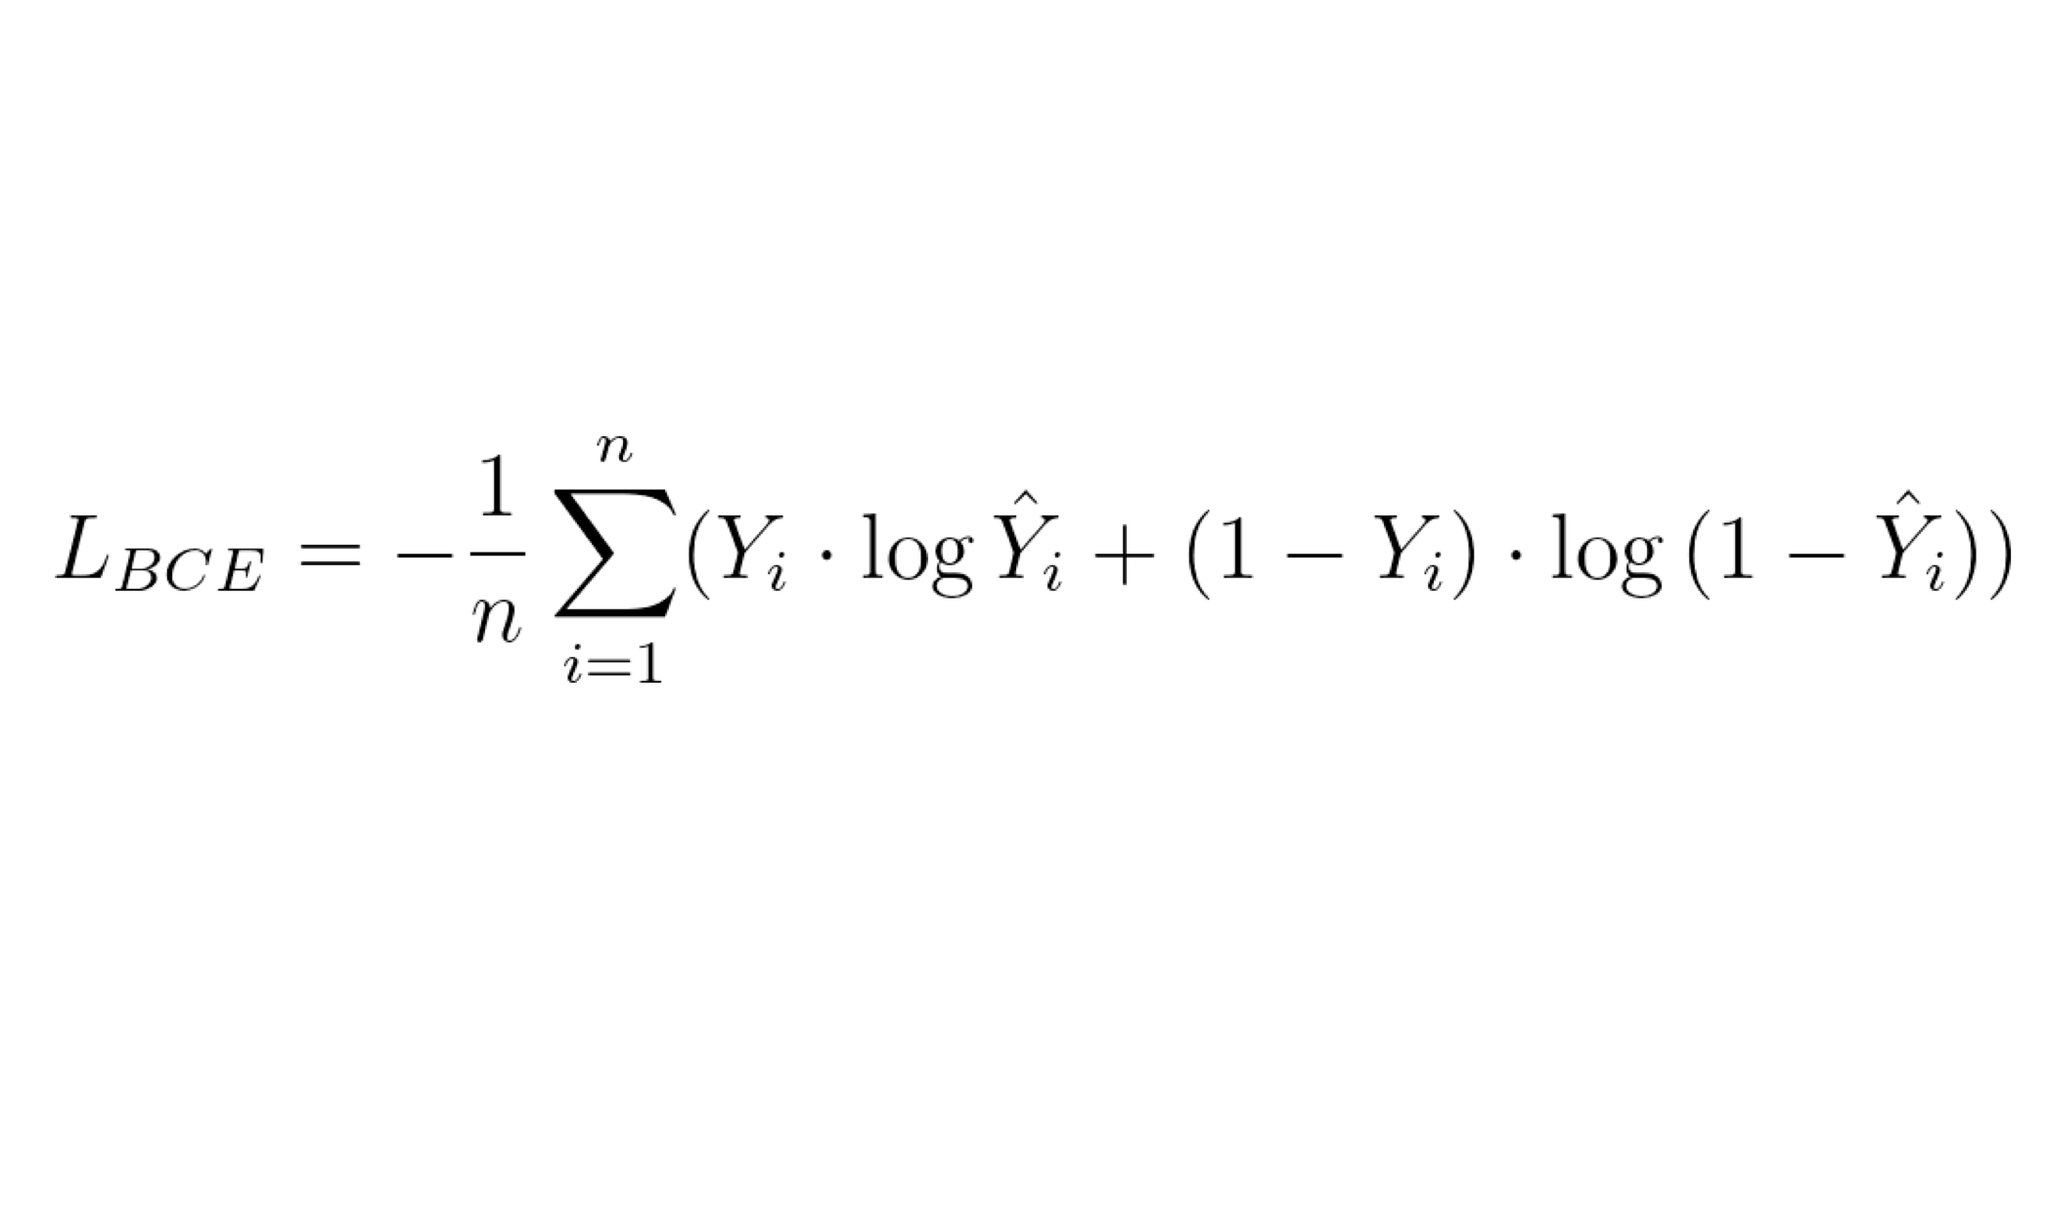

In [7]:
class LogisticRegression:
    def __init__(self, X, y):
        self.X = np.array(X)
        self.Y = np.array(y)
        self.num_attributes = self.X.shape[1]
        self.coef_ = np.zeros(self.num_attributes)
        self.intercept_ = 0

    def sig(self,v):
        return 1/(1 + np.exp(-v))

    # binary cross entropy
    def cost_function(self):
        m = self.X.shape[0]     # number of samples


        """ y_pred

        - self.X @ self.coef_ is matrix multiplication between our feature matrix and our weight matrix 
        - self.intercept_ is just us adding bias
        - similar to linear regression but constrained to a value between 0,1

        """

        y_pred = self.sig(self.X @ self.coef_ + self.intercept_)    # predictions
        return - (1/m) * np.sum(self.Y * np.log(y_pred) + (1 - self.Y) * np.log(1 - y_pred))

    # gradient descent
    def fit(self, lr=0.01, epochs=1000):
        m = self.X.shape[0]

        for _ in range(epochs):
            y_pred = self.sig(self.X @ self.coef_ + self.intercept_)
            error = y_pred - self.Y     # error

            # gradients
            dW = (1/m) * (self.X.T @ error)
            dB = (1/m) * (np.sum(error))

            # updating the parameters
            self.coef_ -= lr * dW
            self.intercept_ -= lr * dB
 

    def predict(self, X_new):
        y_pred = self.sig(X_new @ self.coef_ + self.intercept_)
        return (y_pred >= 0.5).astype(int)  # convert probabilities to class labels


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)  # accuracy calculation

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR labels

X_train = X[:2]
X_test = X[2:]
y_train = y[:2]
y_test = y[2:]

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

std[std == 0] = 1

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

model = LogisticRegression(X_train, y_train)
model.fit(lr=0.1, epochs=5000)

accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

new_data = np.array([[0, 0], [1, 1]])
new_data = (new_data - mean) / std  
predictions = model.predict(new_data)
print("Predictions for [[0,0], [1,1]]:", predictions)

Test Accuracy: 0.0
Predictions for [[0,0], [1,1]]: [0 1]
